In [1]:
import sys
import os

pwd = os.getcwd()
python_path = pwd[: pwd.rfind("/")]
sys.path.append(python_path)

In [2]:
import cv2 as cv
import numpy as np
import jupyter_black
import random
import os

from utils import show_images, read_images
from constants import (
    SEGMENTATION_OBJECT_PATH,
    ORIGINAL_BACTERIAS_PATH,
    ORIGINAL_IMAGES_PATH,
)

jupyter_black.load()

In [4]:
object_images = read_images(SEGMENTATION_OBJECT_PATH)
original_images = read_images(ORIGINAL_IMAGES_PATH)

In [5]:
assert len(object_images) == len(original_images)

Images count: 100


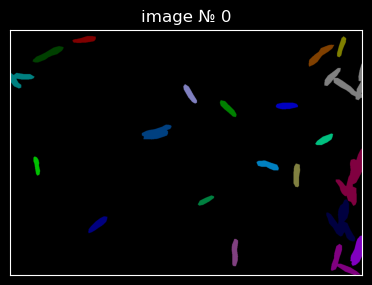

In [6]:
image_to_show_idx = random.randint(0, len(object_images))
image_to_show = object_images[image_to_show_idx]
show_images(
    [(image_to_show, f"image № {image_to_show_idx}")],
    cmap="viridis",
)

print(f"Images count: {len(object_images)}")

In [65]:
def crop_standalone_bacterias_from_image(
    object_image: np.ndarray, original_image: np.ndarray, image_idx: int
):
    unique_colors, _ = np.unique(
        object_image.reshape(-1, object_image.shape[-1]), axis=0, return_counts=True
    )

    for i, unique_color in enumerate(unique_colors):
        black = np.array([0, 0, 0])
        is_black = lambda x: np.array_equal(x, black)

        if not is_black(unique_color):
            mask = cv.inRange(object_image, unique_color, unique_color)
            temp = cv.bitwise_and(original_image, original_image, mask=mask)
            contours, _ = cv.findContours(
                cv.cvtColor(temp, cv.COLOR_BGR2GRAY),
                cv.RETR_EXTERNAL,
                cv.CHAIN_APPROX_SIMPLE,
            )

            for contour in contours:
                x, y, w, h = cv.boundingRect(contour)
                cropped_bacteria = temp[y : y + h, x : x + w]
                if len(cropped_bacteria) > 0 and cv.contourArea(contour) < 5000:
                    file_name = f"{ORIGINAL_BACTERIAS_PATH}/bacteria_{image_idx}_{i}.png"
                    cv.imwrite(file_name, cropped_bacteria)
                    print(f"{file_name} created")

In [66]:
for i in range(len(object_images)):
    crop_standalone_bacterias_from_image(object_images[i], original_images[i], i)

../../data/bacteria_0_2.png created
../../data/bacteria_0_3.png created
../../data/bacteria_0_4.png created
../../data/bacteria_0_5.png created
../../data/bacteria_0_6.png created
../../data/bacteria_0_7.png created
../../data/bacteria_0_8.png created
../../data/bacteria_0_9.png created
../../data/bacteria_0_10.png created
../../data/bacteria_0_11.png created
../../data/bacteria_0_12.png created
../../data/bacteria_0_14.png created
../../data/bacteria_0_15.png created
../../data/bacteria_0_16.png created
../../data/bacteria_0_17.png created
../../data/bacteria_0_18.png created
../../data/bacteria_0_19.png created
../../data/bacteria_0_21.png created
../../data/bacteria_1_1.png created
../../data/bacteria_1_2.png created
../../data/bacteria_1_5.png created
../../data/bacteria_1_6.png created
../../data/bacteria_1_7.png created
../../data/bacteria_1_8.png created
../../data/bacteria_1_9.png created
../../data/bacteria_2_1.png created
../../data/bacteria_2_2.png created
../../data/bacteri